In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm

from MCEq.data import InteractionCrossSections
from MCEq.core import MCEqRun
import  mceq_underground_helpers_oneregion_threshold as helper

In [2]:
testtag='logmulti+1' # to be changed to respective test

In [3]:
def sl_depth(d,angle):
    return d/np.cos(np.deg2rad(angle))

In [4]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'


X = helper.slant_depths[2:-1:4]

In [5]:
cs_p_values = [1.0,1.01] #[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]  # List of cross-section values: pion-air
cs_k_values = [1.00]
cs_pr_values = [1.00]
ptype_values = [2212] 
season_values = ["jan", "apr", "jul"]  #  seasons
e0_values = [2.05,2.15,2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,3.65,3.75,3.85,3.95,4.05,4.15,4.25,4.35,4.45,4.55,4.65,4.75,4.85]
e1_values = [2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,3.65,3.75,3.85,3.95,4.05,4.15,4.25,4.35,4.45,4.55,4.65,4.75,4.85,4.95,5.05]
e_center = e0_values + np.ones(len(e0_values))*0.1
pairwise = True


helper.initialize_flux_dicts(
        ptype_values, cs_p_values, cs_k_values, cs_pr_values, e0_values, e1_values if 'e1_values' in locals() else [None], pairwise=pairwise
) 

helper.some_function_that_uses_angles()
angles = helper.angles

2.05 2.25
helper script 2.05 2.25 1.01 1.0 1.0
2.15 2.35
helper script 2.15 2.35 1.01 1.0 1.0
2.25 2.45
helper script 2.25 2.45 1.01 1.0 1.0
2.35 2.55
helper script 2.35 2.55 1.01 1.0 1.0
2.45 2.65
helper script 2.45 2.65 1.01 1.0 1.0
2.55 2.75
helper script 2.55 2.75 1.01 1.0 1.0
2.65 2.85
helper script 2.65 2.85 1.01 1.0 1.0
2.75 2.95
helper script 2.75 2.95 1.01 1.0 1.0
2.85 3.05
helper script 2.85 3.05 1.01 1.0 1.0
2.95 3.15
helper script 2.95 3.15 1.01 1.0 1.0
3.05 3.25
helper script 3.05 3.25 1.01 1.0 1.0
3.15 3.35
helper script 3.15 3.35 1.01 1.0 1.0
3.25 3.45
helper script 3.25 3.45 1.01 1.0 1.0
3.35 3.55
helper script 3.35 3.55 1.01 1.0 1.0
3.45 3.65
helper script 3.45 3.65 1.01 1.0 1.0
3.55 3.75
helper script 3.55 3.75 1.01 1.0 1.0
3.65 3.85
helper script 3.65 3.85 1.01 1.0 1.0
3.75 3.95
helper script 3.75 3.95 1.01 1.0 1.0
3.85 4.05
helper script 3.85 4.05 1.01 1.0 1.0
3.95 4.15
helper script 3.95 4.15 1.01 1.0 1.0
4.05 4.25
helper script 4.05 4.25 1.01 1.0 1.0
4.15 4.35
hel

In [6]:
def get_log_y(X, angle,cs_p,cs_k,cs_pr,e0,e1,season,threshold):
    log_y = np.log10(1e4*helper.mult_dist(X,
                            angle,
                            pm.GlobalSplineFitBeta(),"yields_" + season,
                            2212,
                            cs_p, cs_k,cs_pr,e0,e1,
                            norm=False,threshold=threshold#))[0]
                        ) / helper.rates(X, angle, season, 2212, cs_p, cs_k,cs_pr, e0,e1,threshold))

    return log_y

In [7]:
def get_derivative(x_log, log_y):

    deriv_low = (log_y[19] - log_y[1])/(np.log10(x_log[19])-np.log10(x_log[1])) 
    deriv_high = (log_y[99] - log_y[59])/(np.log10(x_log[99])-np.log10(x_log[59])) 

    return np.array([deriv_low, deriv_high])

In [8]:
if testtag=='logmulti': 
    x_log = helper.n_mu_vec
else:
    
    x_log = np.log10(helper.n_mu_vec)
print(x_log)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


In [9]:
sl = sl_depth(1.5,angles)

In [10]:
cs_p = 1.01
cs_k = 1.0
cs_pr = 1.0
angle = 0.0

logy_mod_500 = np.ndarray(shape=(len(sl),len(season_values),len(e0_values),len(x_log)))
y_log_def_sl_500 = np.ndarray(shape=(len(sl),len(season_values),len(x_log)))

for s in range(len(sl)):  
    for sea in range(len(season_values)):  
        y_log_def_sl_500[s][sea] = get_log_y(sl[s], angle, 1.0, cs_k, cs_pr ,2.05,"inf",season_values[sea],threshold=500)
        
        for en in range(len(e0_values)):
            logy_mod_500[s][sea][en] = get_log_y(sl[s], angle, cs_p, cs_k ,cs_pr,e0_values[en],e1_values[en],season_values[sea],threshold=500)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2695914/2927078530.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[d,1,13+i]/y_log_def_sl_500[d,1],label='log(E$_{\mathrm{center}}$/GeV)= ' + str(e0_values[13+i]))


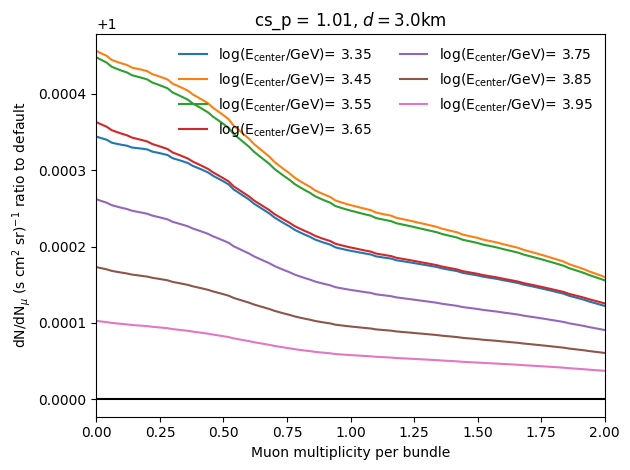

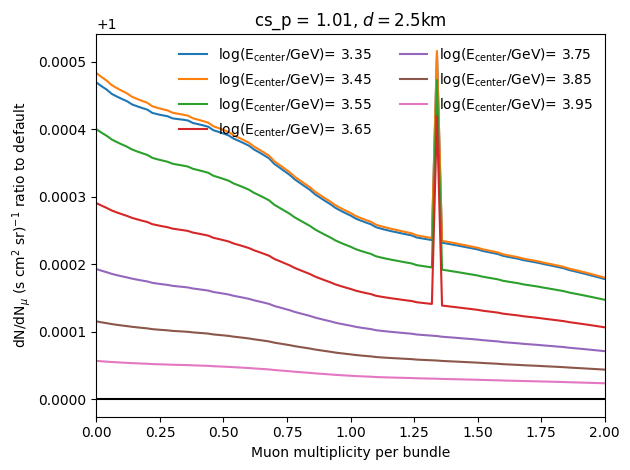

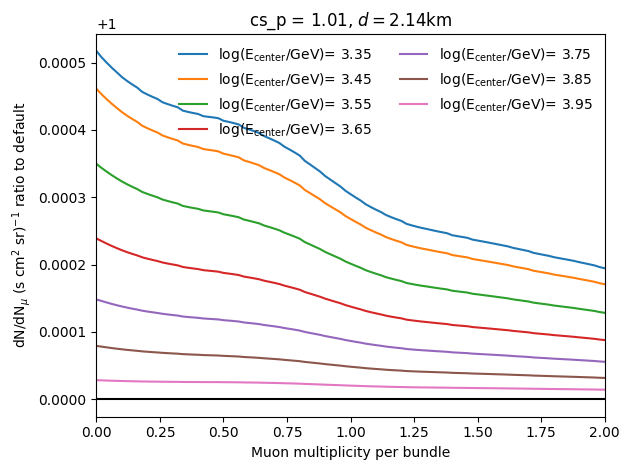

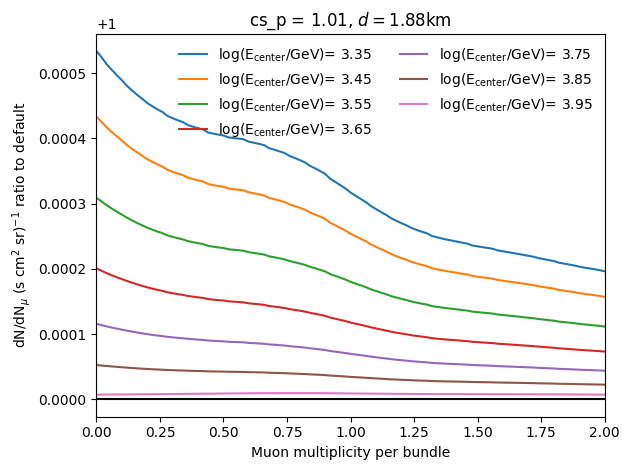

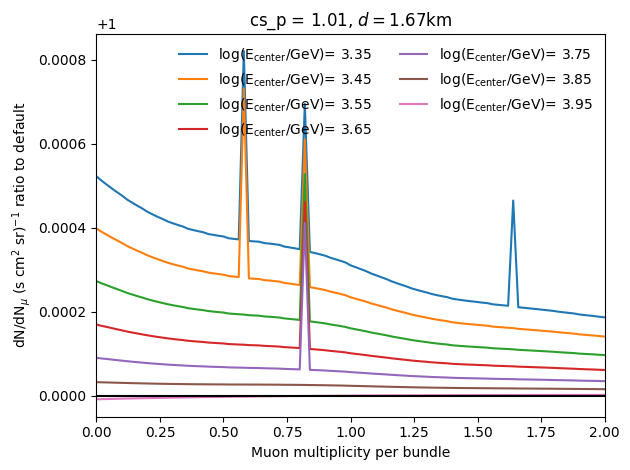

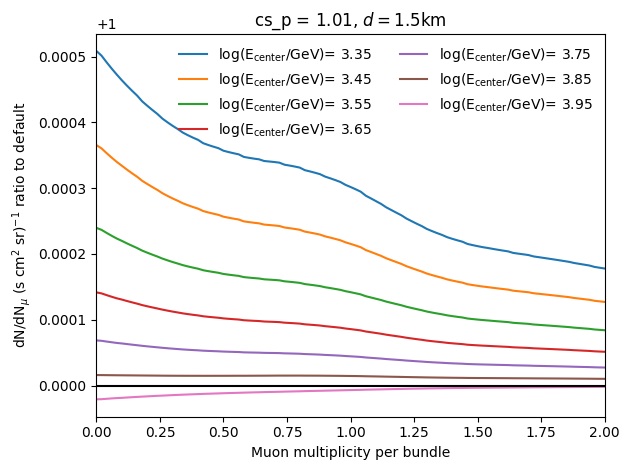

<Figure size 640x480 with 0 Axes>

In [11]:
for d in range(len(sl)):
    for i in range(7):
        plt.plot(np.log10(helper.n_mu_vec),logy_mod_500[d,1,13+i]/y_log_def_sl_500[d,1],label='log(E$_{\mathrm{center}}$/GeV)= ' + str(e0_values[13+i]))
    plt.plot([0,2],[1.,1.], color='black')
        
    plt.xlabel("Muon multiplicity per bundle")
    plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$ ratio to default")
    plt.title('cs_p = 1.01, $d=$' + str(np.round(sl[d],decimals=2))+'km')
   
    plt.legend(frameon=False,ncol=2)
    plt.xlim(0,2)
    #plt.ylim(-1.,1.00006)

    plt.tight_layout()

    plt.savefig(plot_dir + 'multispectrum_cs_p1.01_ratio-to-def_TeVrange_d'+ str(np.round(sl[d],decimals=2))+'_' +testtag+ '.png')
    plt.show()
    plt.clf()

In [12]:
np.logspace(1, 10, 101)

array([1.00000000e+01, 1.23026877e+01, 1.51356125e+01, 1.86208714e+01,
       2.29086765e+01, 2.81838293e+01, 3.46736850e+01, 4.26579519e+01,
       5.24807460e+01, 6.45654229e+01, 7.94328235e+01, 9.77237221e+01,
       1.20226443e+02, 1.47910839e+02, 1.81970086e+02, 2.23872114e+02,
       2.75422870e+02, 3.38844156e+02, 4.16869383e+02, 5.12861384e+02,
       6.30957344e+02, 7.76247117e+02, 9.54992586e+02, 1.17489755e+03,
       1.44543977e+03, 1.77827941e+03, 2.18776162e+03, 2.69153480e+03,
       3.31131121e+03, 4.07380278e+03, 5.01187234e+03, 6.16595002e+03,
       7.58577575e+03, 9.33254301e+03, 1.14815362e+04, 1.41253754e+04,
       1.73780083e+04, 2.13796209e+04, 2.63026799e+04, 3.23593657e+04,
       3.98107171e+04, 4.89778819e+04, 6.02559586e+04, 7.41310241e+04,
       9.12010839e+04, 1.12201845e+05, 1.38038426e+05, 1.69824365e+05,
       2.08929613e+05, 2.57039578e+05, 3.16227766e+05, 3.89045145e+05,
       4.78630092e+05, 5.88843655e+05, 7.24435960e+05, 8.91250938e+05,
      